# Preprocessing Text Data

The purpose of this notebook is to conduct the preprocessing steps that are necessary for text data in NLP. This includes tokenizing, removing stop words, vectorizing, etc.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
import pickle

### Loading in the clean dataframe from `data_cleaning.ipynb`


In [59]:
# this is our corpus
clean_df = pd.read_pickle('../pickle/clean_df.pkl')

In [60]:
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldnt complain about clea...
1,3,0,3,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad for cuffin dat ho...
2,3,0,3,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she sta to...
3,3,0,3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranny
4,6,0,6,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or...


### Creating `tweet_df` with only cleaned tweets column

In [61]:
tweet_df = clean_df[['clean_tweets', 'label']].copy()

In [62]:
tweet_df.head()

,clean_tweets,label
0,as a woman you shouldnt complain about clea...,0
1,boy dats coldtyga dwn bad for cuffin dat ho...,0
2,dawg you ever fuck a bitch and she sta to...,0
3,she look like a tranny,0
4,the shit you hear about me might be true or...,0


In [63]:
data = tweet_df['clean_tweets']
target = tweet_df['label']

## Tokenizing Before Removing Stop Words

When working with text data, one of the first steps is to remove stop words from the corpus. Although text would be gramatically incorrect without these stop words, they provide little value to models and typically hinder performace.

Before removing stop words, let's take a look at the top words in this corpus.

In [64]:
# function to tokenize without removing stop words
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [65]:
# applying this function to the `clean_tweets` column
unfilterd_data = list(map(unfiltered_tokens, data))

In [66]:
# morphing `unfiltered_data` into a readable list
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]

In [67]:
# getting frequency distribution
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
# top 20 words in the corpus
dirty_corpus_freqdist.most_common(20)

[('a', 9476),
 ('bitch', 8227),
 ('i', 7538),
 ('the', 7168),
 ('you', 6120),
 ('to', 5332),
 ('and', 3951),
 ('my', 3579),
 ('that', 3528),
 ('bitches', 3083),
 ('in', 3051),
 ('is', 2909),
 ('like', 2766),
 ('me', 2764),
 ('of', 2544),
 ('on', 2518),
 ('be', 2375),
 ('hoes', 2368),
 ('this', 2149),
 ('for', 2119)]

We can see that stop words typically dominate the top spots. Such as 'a', 'i', 'the', 'to', etc. But this tells us nothing about the actual content of the corpus, and will negatively impact model performance.

Let's actually remove the stop words now.

## Removing Stop Words in Tokenization
We can use NLTK's built-in library of stop words to remove them in a tokenizing function.

In [68]:
stop_words = set(stopwords.words('english'))

In [69]:
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [70]:
# applying the above function to our data/features 
processed_data = list(map(process_tweet, data))

In [71]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

20277

In [194]:
# pickling procesed_data for later use
pickle_out = open('../pickle/processed_data.pkl','wb')
pickle.dump(processed_data, pickle_out)
pickle_out.close()

Here we can see that our corpus has a vocabulary of 20277. This would also be the number of columns in the sparse matrix after we vectorize the data later.

Now that the stop words are removed and the corpus is tokenized, let's take a look at the top words in this corpus.

In [72]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('bitch', 8227),
 ('bitches', 3083),
 ('like', 2766),
 ('hoes', 2368),
 ('pussy', 2099),
 ('im', 2061),
 ('hoe', 1906),
 ('dont', 1749),
 ('got', 1597),
 ('ass', 1570),
 ('get', 1428),
 ('fuck', 1411),
 ('u', 1280),
 ('shit', 1262),
 ('nigga', 1198),
 ('aint', 1158),
 ('trash', 1142),
 ('lol', 1074),
 ('know', 806),
 ('niggas', 791)]

We can see that the "meaningless" stop words have been removed from the corpus. Some of the words here are still up for debate, but let's run this data through some baseline models and see how they perform.

## Lemmatization

This last method reduces each word into a linguistically valid **lemma**, or root word. It does this through linguistic mappings, using the WordNet lexical database.


In [73]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [74]:
X_lem = lemmatized_output
y_lem = target

In [75]:
# pickle these for modeling
pickle_out = open('../pickle/X_lem.pkl','wb')
pickle.dump(X_lem, pickle_out)
pickle_out.close()

In [76]:
y_lem.to_pickle('../pickle/y_lem.pkl')

### Now `X_lem` and `y_lem` are ready to be brought over to the modeling notebooks.

## Additional Corpus EDA - Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling.

In [77]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [78]:
# creating a finder & passing in tokenized corpus
bigram_finder = BigramCollocationFinder.from_words(flat_filtered)

In [79]:
# computing bigram scores
corpus_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [80]:
# top 20 bigrams
corpus_scored[:20]

[(('wan', 'na'), 0.0018295365531745946),
 (('got', 'ta'), 0.001657849838507184),
 (('gon', 'na'), 0.0015666412713401222),
 (('bitch', 'ass'), 0.0012769199403388667),
 (('like', 'bitch'), 0.0011910765830051614),
 (('bitch', 'im'), 0.001169615743671735),
 (('look', 'like'), 0.0010837723863380297),
 (('ass', 'bitch'), 0.0010730419666713166),
 (('yo', 'bitch'), 0.0010301202880044638),
 (('bad', 'bitch'), 0.0009711029798375415),
 (('bitch', 'dont'), 0.0009603725601708283),
 (('bad', 'bitches'), 0.0007672250061699913),
 (('bitch', 'bitch'), 0.0007618597963366347),
 (('ass', 'nigga'), 0.0007135729078364255),
 (('hoes', 'aint'), 0.0006921120685029991),
 (('bitch', 'got'), 0.000681381648836286),
 (('fuck', 'bitch'), 0.000681381648836286),
 (('bitch', 'aint'), 0.0006706512291695728),
 (('little', 'bitch'), 0.0006652860193362163),
 (('bitch', 'nigga'), 0.0005687122423357978)]

Is seems that most of these are nonsensical phrases, and may indicate that the data is still dirty. Next, we can use mutual information scores to show us the "best" bigrams.

## Calculating Mutual Information Scores

Pointwise Mutual Information Score is a statistical measure from information theory that generally measures the mutual dependence between two words. In plain english, this measures how much information the bigram itself contains by computing the dependence between the two words in the bigram. 


In [81]:
# creating a finder for pmi & passing in torkenized corpus
pmi_finder = BigramCollocationFinder.from_words(flat_filtered)

In [82]:
# applying frequency filter that only examines bigrams that occur more than 5 times
pmi_finder.apply_freq_filter(5)

In [83]:
# using finder to calculate pmi scores
pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)

In [84]:
# first 30 elements in this list
pmi_scored[:30]

[(('wishy', 'washy'), 14.922971472714778),
 (('dej', 'loaf'), 14.70057905137833),
 (('disrupts', 'shylock'), 14.700579051378327),
 (('operation', 'disrupts'), 14.700579051378327),
 (('shylock', 'banking'), 14.700579051378327),
 (('aux', 'cord'), 14.507933973435932),
 (('cargos', 'haircut'), 14.507933973435932),
 (('spear', 'chucker'), 14.507933973435932),
 (('trey', 'songz'), 14.507933973435932),
 (('sweetest', 'joy'), 13.922971472714778),
 (('coloured', 'cargos'), 13.922971472714774),
 (('plot', 'twist'), 13.855857276856236),
 (('khaki', 'coloured'), 13.659937066880982),
 (('justin', 'bieber'), 13.585101833958394),
 (('revenge', 'sweetest'), 13.49001206543867),
 (('miley', 'cyrus'), 13.282967608435657),
 (('scally', 'lad'), 13.218427356240948),
 (('sloppy', 'toppy'), 13.186005878548569),
 (('rated', 'spa'), 13.11561655065717),
 (('twitpic', 'selfie'), 13.070528661128636),
 (('grand', 'opening'), 13.016080877106258),
 (('merry', 'christmas'), 12.963613457212123),
 (('nicki', 'minaj'), 

These are the top 30 bigrams, according to PMI score. Most of these are identifiable as English slang terms. Def Loaf is an american rapper, and Shylock is a malware that targets banks.

We can impliment bigrams into models using `ngram_range` during the TF-IDF vectorization stage. From there, we can start running some baseline models to see how they perform with this data.

In [133]:
bigrams_list = pmi_scored[:30]

In [134]:
bigrams_list

[(('wishy', 'washy'), 14.922971472714778),
 (('dej', 'loaf'), 14.70057905137833),
 (('disrupts', 'shylock'), 14.700579051378327),
 (('operation', 'disrupts'), 14.700579051378327),
 (('shylock', 'banking'), 14.700579051378327),
 (('aux', 'cord'), 14.507933973435932),
 (('cargos', 'haircut'), 14.507933973435932),
 (('spear', 'chucker'), 14.507933973435932),
 (('trey', 'songz'), 14.507933973435932),
 (('sweetest', 'joy'), 13.922971472714778),
 (('coloured', 'cargos'), 13.922971472714774),
 (('plot', 'twist'), 13.855857276856236),
 (('khaki', 'coloured'), 13.659937066880982),
 (('justin', 'bieber'), 13.585101833958394),
 (('revenge', 'sweetest'), 13.49001206543867),
 (('miley', 'cyrus'), 13.282967608435657),
 (('scally', 'lad'), 13.218427356240948),
 (('sloppy', 'toppy'), 13.186005878548569),
 (('rated', 'spa'), 13.11561655065717),
 (('twitpic', 'selfie'), 13.070528661128636),
 (('grand', 'opening'), 13.016080877106258),
 (('merry', 'christmas'), 12.963613457212123),
 (('nicki', 'minaj'), 

## Visualizing Bigram Frequency

In [166]:
bigrams_series = (pd.Series(nltk.ngrams(flat_filtered, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

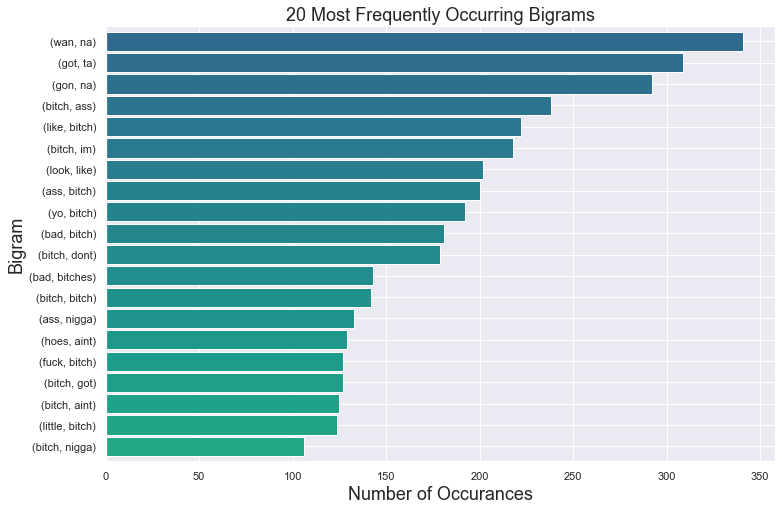

In [195]:
bigrams_series.sort_values().plot.barh(color=cm.viridis_r(np.linspace(.4,.8, 30)), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occurring Bigrams', fontsize=18)
plt.ylabel('Bigram', fontsize=18)
plt.xlabel('Number of Occurances', fontsize=18)

## Stretch Goal: Visualizing Top Bigram Score

### Converting list to DF we can censor the bigrams

In [135]:
bigrams_df = pd.DataFrame(bigrams_list,columns=['bigram', 'pmi_score'])

In [136]:
bigrams_df.head()

,bigram,pmi_score
0,"(wishy, washy)",14.922971
1,"(dej, loaf)",14.700579
2,"(disrupts, shylock)",14.700579
3,"(operation, disrupts)",14.700579
4,"(shylock, banking)",14.700579
